In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
LoanData = pd.read_csv("Loan Data 2.csv")

In [3]:
LD = LoanData[LoanData!= '..']
LD1 = LD.dropna()
LD1.head()
LD1.info()
LD1.describe()
LD1.columns
temp = pd.get_dummies(LD1["Purpose"])
LD2 = pd.concat([LD1, temp], axis=1)
LD2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41336 entries, 0 to 41401
Data columns (total 21 columns):
Loan Amount                  41336 non-null int64
Funded Amouint               41336 non-null int64
Term                         41336 non-null object
Interest Rate                41336 non-null object
Installment                  41336 non-null float64
Employment Length            41336 non-null object
Home Ownership               41336 non-null object
annual_inc                   41336 non-null float64
Approved Date                41336 non-null object
Loan Status                  41336 non-null object
Purpose                      41336 non-null object
Borrower's State             41336 non-null object
DTI                          41336 non-null float64
Delinquencies last 2-yrs     41336 non-null float64
Earliest Credit Line         41336 non-null object
# Inquiries last 6 months    41336 non-null float64
Open Accounts                41336 non-null float64
Revolving Balance   

,Loan Amount,Funded Amouint,Term,Interest Rate,Installment,Employment Length,Home Ownership,annual_inc,Approved Date,Loan Status,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,5000,5000,36 months,10.65%,162.87,10+ years,RENT,24000.00,12/1/2011,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1,2500,2500,60 months,15.27%,59.83,< 1 year,RENT,30000.00,12/1/2011,Charged Off,...,0,0,0,0,0,0,0,0,0,0
2,2400,2400,36 months,15.96%,84.33,10+ years,RENT,12252.00,12/1/2011,Fully Paid,...,0,0,0,0,0,0,0,1,0,0
3,10000,10000,36 months,13.49%,339.31,10+ years,RENT,49200.00,12/1/2011,Fully Paid,...,0,0,0,0,0,1,0,0,0,0
4,3000,3000,60 months,12.69%,67.79,1 year,RENT,80000.00,12/1/2011,Fully Paid,...,0,0,0,0,0,1,0,0,0,0
5,5000,5000,36 months,7.90%,156.46,3 years,RENT,36000.00,12/1/2011,Fully Paid,...,0,0,0,0,0,0,0,0,0,1
6,7000,7000,60 months,15.96%,170.08,8 years,RENT,47004.00,12/1/2011,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
7,3000,3000,36 months,18.64%,109.43,9 years,RENT,48000.00,12/1/2011,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
8,5600,5600,60 months,21.28%,152.39,4 years,OWN,40000.00,12/1/2011,Charged Off,...,0,0,0,0,0,0,0,1,0,0
9,5375,5375,60 months,12.69%,121.45,< 1 year,RENT,15000.00,12/1/2011,Charged Off,...,0,0,0,0,0,1,0,0,0,0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


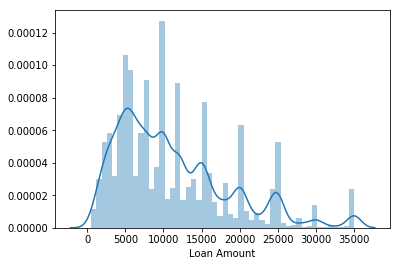

In [4]:
sns.distplot(LD2['Loan Amount'])
plt.savefig('Histogram.png')

In [ ]:
sns.pairplot(LD1)

In [5]:
LD3 = LD2.corr()
print(LD3)

                           Loan Amount  Funded Amouint  Installment  \
Loan Amount                   1.000000        0.981540     0.930252   
Funded Amouint                0.981540        1.000000     0.956185   
Installment                   0.930252        0.956185     1.000000   
annual_inc                    0.273568        0.269381     0.275256   
DTI                           0.063342        0.063117     0.052976   
Delinquencies last 2-yrs     -0.034461       -0.035295    -0.021873   
# Inquiries last 6 months    -0.030624       -0.030294    -0.010972   
Open Accounts                 0.172499        0.170692     0.171505   
Revolving Balance             0.252412        0.248643     0.263298   
Total # of Accounts           0.255599        0.249652     0.232504   
Total Debt Owed               0.882167        0.898518     0.847634   
car                          -0.116227       -0.114761    -0.125643   
credit_card                   0.026120        0.026455     0.041234   
debt_c

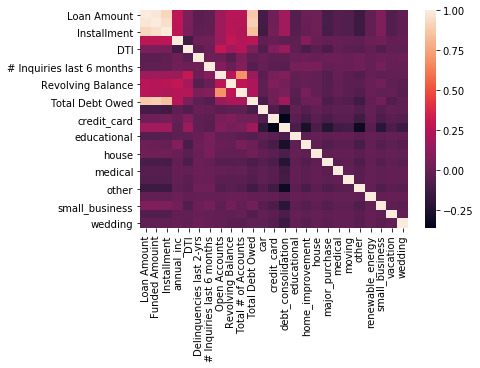

In [6]:
sns.heatmap(LD3)
plt.savefig('Heatmap.png')

In [20]:
X = LD2[['Funded Amouint', 'Installment', 'annual_inc',
               'Loan Amount', 'Delinquencies last 2-yrs','# Inquiries last 6 months', 'Open Accounts', 'Revolving Balance',
         'Total # of Accounts', 'Total Debt Owed']]
y = LD2['DTI']
print(X.shape, y.shape)

(41336, 10) (41336,)


In [21]:
#X = LD1[['DTI', 'Delinquencies last 2-yrs']]
#y = LD1['Loan Amount']
#print(X.shape, y.shape)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
predictions = model.predict(X_test)

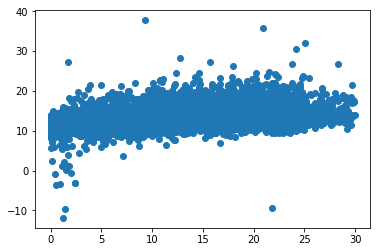

In [26]:
plt.scatter(y_test,predictions)
plt.savefig('DTI_Reg.png')

In [28]:
X = LD2[['Funded Amouint', 'Installment', 'annual_inc',
               'DTI', 'Delinquencies last 2-yrs','# Inquiries last 6 months', 'Open Accounts', 'Revolving Balance',
         'Total # of Accounts', 'Total Debt Owed']]
y = LD2['Loan Amount']
print(X.shape, y.shape)

(41336, 10) (41336,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
predictions = model.predict(X_test)

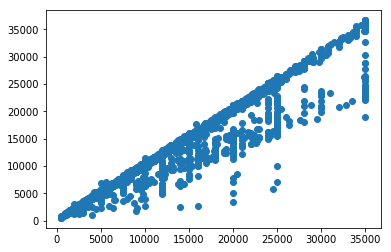

In [34]:
plt.scatter(y_test,predictions)
plt.savefig('LA_Reg.png')